### TP1 : Source coding

On crée nous même un alphabet A avec les probas associés, on génère un vecteur aléatoire avec les symboles de l'alphabet. On calcule l'entropie, puis l'entropie réelle à partir de l'apparition des symboles dans le vecteur. 

In [22]:
Alphabet = {'A': 0.36, 'B': 0.12,'C': 0.35,'D': 0.04,'E': 0.09,'F': 0.01,'G': 0.03}

In [23]:
import random

def genVecteur(n, Alpha):
    tab = []
    for i in range(n) :
        r = random.randint(0,999999999)
        r = r%100
        val = 0.0
        for cle,valeur in Alpha.items():
            val += valeur*100
            if (r <= val) :
                tab.append (cle)
                break
    return tab 


In [24]:
import math as m

def entropieReelle(X, Alpha):
    # print(X)
    dico = {}
    ent = 0
    for key in Alpha:
        dico[key] = 0
    for i in range (len(X)):
        dico[X[i]]=dico[X[i]]+1
    for cle, valeur in dico.items():
        pReelle = valeur/len(X)
        if pReelle != 0:
            ent = ent + pReelle*m.log(pReelle, 2)
    return -ent

In [25]:
entropieReelle(genVecteur(100, Alphabet), Alphabet)

2.1370500686915297

In [26]:
Alphabet2 = {'A': 0.5, 'B': 0.5 }

entropieReelle(genVecteur(1000, Alphabet2), Alphabet2)

0.9999278640456615

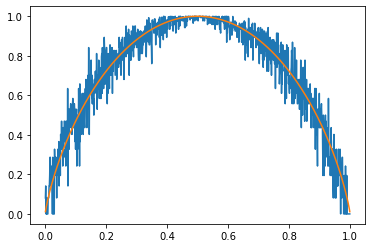

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def affichage(n):
    Lx = np.linspace(0.001,0.999,n)
    LyR=[]
    LyT=[]
    for a in Lx:
        Alphabet3 = {'0': a, '1': 1-a}
        LyT.append(-(a*m.log(a,2) + (1-a)*m.log(1-a,2)))
        LyR.append(entropieReelle(genVecteur(100, Alphabet3), Alphabet3))
    plt.plot(Lx, LyR)
    plt.plot(Lx, LyT)
    plt.show()
    
affichage(1000)

Question 4

            (p00               p10)
            (p01               p11)

(p0     p1) (p0*p00+p1*p01     p0*p10+p1*p11)

On a donc p0 = p0*p00+p1*p01 en régime stationnaire

or p1 = 1-p0

On obtient donc p0*p00 + (1-p0)*p01 = p0

p0*(p00-1-p01)=-p01

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

H(xk)   = Σ (xk|x(k-1)).p(x(k-1))
        = H(xk|x(k-1)=0).p(x(k-1)=0) + H(xk|x(k-1)=1).p(x(k-1)=1)
        = H(xk|x(k-1)=0).p0 + H(xk|x(k-1)=1).p1
        = -[ p(xk=0|x(k-1)=0).log2(p(xk=0|x(k-1)=0)) + p(xk=1|x(k-1)=0).log2(p(xk=1|x(k-1)=0)) ].p0
          -[ p(xk=0|x(k-1)=1).log2(p(xk=0|x(k-1)=1)) + p(xk=1|x(k-1)=1).log2(p(xk=1|x(k-1)=1)) ].p1
        = -[ p00.log2(p00) + p01.log2(p01) ].p0 - [ p10.log2(p10) + p11.log2(p11) ].p1
          

In [28]:
from PIL import Image as Img
import numpy as np

def matriceTransition(picture):
    im = Img.open(picture)
    imgData = np.asarray(im)
    nN = 0
    bN = 0
    for i in range(len(imgData)):
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel noir et que le pixel "proche" associé est noir
                nN += 1 # on augmente le compteur de pixel noir associé à un pixel noir
            if imgData[i][j] == 1 and imgData[(i+1)%len(imgData)][j] == 0: # si on a un pixel blanc et que le pixel "proche" associé est noir
                bN += 1 # on augmente le compteur de pixel blanc associé à un pixel noir
    nbPixel = len(imgData)*len(imgData[0]) # on calcule le nombre de pixels total
    P = [[nN/nbPixel, 1-(nN/nbPixel)], [bN/nbPixel, 1-(bN/nbPixel)]]
    return P

In [29]:
[[p00, p10], [p01, p11]] = matriceTransition(r"./image.png")

import math as m

p0=p01/(1+p01-p00)
p1=(1-p00)/(1+p01-p00)

# Entropie H(xk)
H1 = -(p00*m.log(p00,2)+p01*m.log(p01,2))*p0 - (p10*m.log(p10,2)+p11*m.log(p11,2))*p1

# Entropie de la source sans mémoire ?
H2 = -p0*m.log(p0,2) - p1*m.log(p1,2)

# Taille moyenne ????


print (H1, H2)

KeyboardInterrupt: 

In [ ]:
from PIL import Image as Img
import numpy as np

def matriceTransition2(picture):
    im = Img.open(picture)
    imgData = np.asarray(im)
    res = []
    for i in range(len(imgData)):
        colorActual = "B"
        string_row = ""
        nombrePixel = 0
        for j in range(len(imgData[0])):
            if imgData[i][j] == 0 :#si pixel noir
                if colorActual == "N" :#si série de pixels noirs
                    nombrePixel += 1
                else :#si série de pixels blancs
                    string = colorActual + str(nombrePixel)
                    string_row += string
                    nombrePixel = 1
                    colorActual = "N"
            else :#si pixel blanc
                if colorActual == "B" :#si série de pixels blancs
                    nombrePixel += 1
                else :#si série de pixels noirs
                    string = colorActual + str(nombrePixel)
                    string_row += string
                    nombrePixel = 1
                    colorActual = "B"
        string = colorActual + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 1
        colorActual = "B"
    return res


#print(matriceTransition2(r"./image.png"))

['B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 'B2550', 

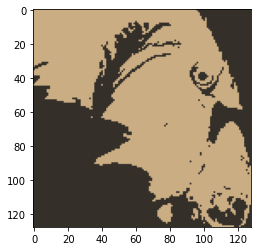

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
  
def kMeansAlgo(k):
    image = cv2.imread('ex9Data/bird_small.tiff') 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    segmented_data = centers[labels.flatten()] 
    segmented_image = segmented_data.reshape((image.shape)) 
    plt.imshow(segmented_image)

kMeansAlgo(2)